## Dataloading and Describing steps
This step will tell us the columns of the datasets, if you want to see the data distribution, uncomment the following two output sentences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
CLEANED_DATA_FILE = '../data/Life_Style_Data_Cleaned.csv'

try:
    df = pd.read_csv(CLEANED_DATA_FILE)
    print(f"Dataset shape: {df.shape}")

except FileNotFoundError:
    print(f"Error: '{CLEANED_DATA_FILE}' not found.")

if 'df' in locals():
    df.info()
    missing_vals = df.isnull().sum()
    if missing_vals.sum() == 0:
        print("No missing values found.")
    else:
        print(missing_vals[missing_vals > 0])

Dataset shape: (20000, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             20000 non-null  float64
 1   gender                          20000 non-null  object 
 2   weight_(kg)                     20000 non-null  float64
 3   height_(m)                      20000 non-null  float64
 4   max_bpm                         20000 non-null  float64
 5   avg_bpm                         20000 non-null  float64
 6   resting_bpm                     20000 non-null  float64
 7   session_duration_(hours)        20000 non-null  float64
 8   calories_burned                 20000 non-null  float64
 9   workout_type                    20000 non-null  object 
 10  fat_percentage                  20000 non-null  float64
 11  water_intake_(liters)           20000 non-null  float64
 12  worko

## 2. Exploratory Data Analysis (EDA)

Now we move to the "in-depth exploratory data analysis (EDA) and correlation studies" task (Nov 12 - Nov 19).

Our goals are:
1.  Understand the distribution of key lifestyle factors (like workout types, diet types).
2.  Identify potential correlations between numerical lifestyle variables (e.g., "how does workout frequency relate to calories burned?")
3.  Generate "comparative plots across demographic and lifestyle groups" (e.g., "how does diet type affect BMI?")

We will start by cleaning one useless column and then plotting the distributions of our key categorical variables.

Dropped 'meal_name' column as it has only 1 unique value.

--- 1. Analyzing Key Categorical Distributions ---


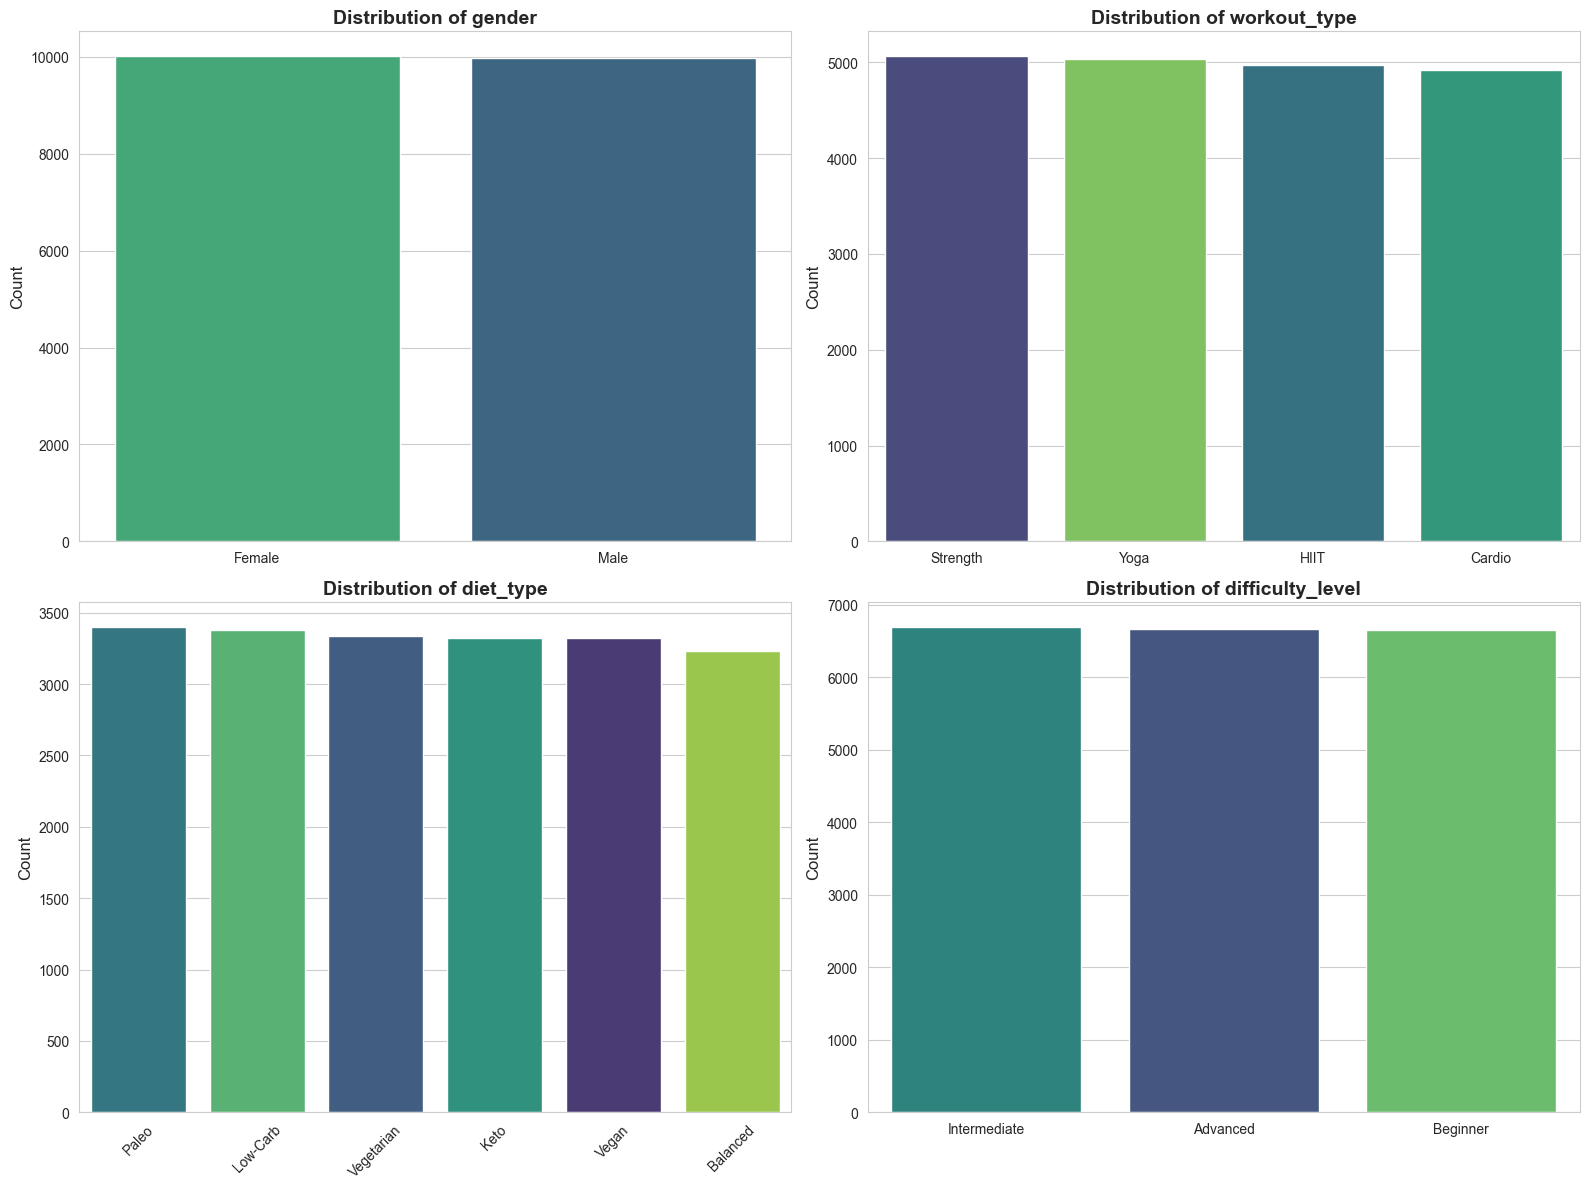

In [2]:
# From the df.describe() output, 'meal_name' has only 1 unique value ("Other").
# This column provides no information, so we drop it.
if 'meal_name' in df.columns:
    df.drop('meal_name', axis=1, inplace=True)
    print("Dropped 'meal_name' column as it has only 1 unique value.")

print("\n--- 1. Analyzing Key Categorical Distributions ---")

categorical_cols = ['gender', 'workout_type', 'diet_type', 'difficulty_level']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df,
        x=col,
        ax=axes[i],
        order=df[col].value_counts().index,
        palette='viridis',
        hue=col,
        legend=False
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count', fontsize=12)

    if df[col].nunique() > 4:
         axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
# plt.savefig('key_categorical_distributions.png', dpi=300)
plt.show()

### [Important] Key finding 1
The dataset is extremely balanced.

Our EDA findings show that the dataset is perfectly balanced across key categorical variables such as diet type and exercise type. While this may not perfectly reflect the distribution of the real-world population, it provides an ideal environment for our correlation analysis because it eliminates statistical biases that may arise due to differences in sample size.

## Correlation Analysis (Heatmap)

Now we will perform a "correlation study" to see how the main numerical variables relate to each other. This heatmap will help us spot interesting relationships to investigate further.

We will focus on key lifestyle habits and health outcomes:
* **Habits**: `session_duration_(hours)`, `workout_frequency_(days/week)`, `water_intake_(liters)`, `calories` (intake)
* **Metrics**: `age`, `bmi`, `fat_percentage`
* **Outcome**: `calories_burned` (workout expenditure)


--- 2. Correlation Analysis (Numerical) ---


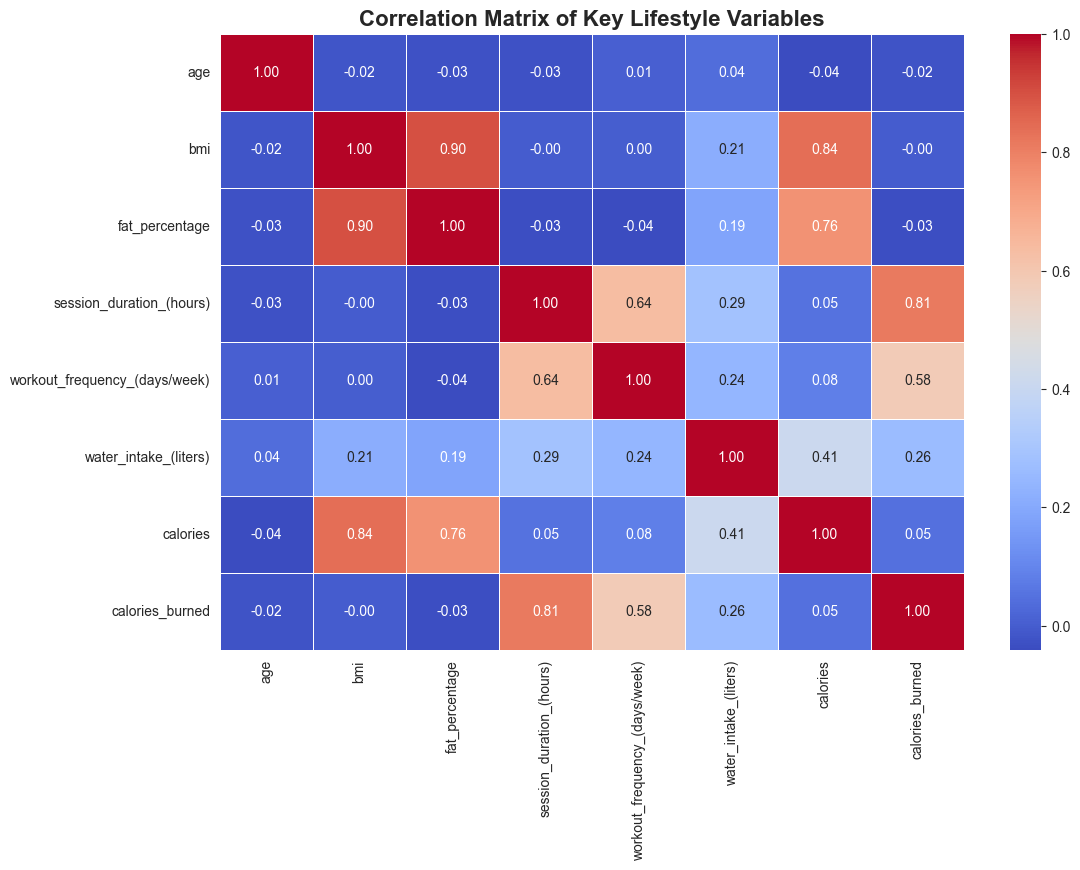

In [3]:
print("\n--- 2. Correlation Analysis (Numerical) ---")

key_numerical_cols = [
    'age',
    'bmi',
    'fat_percentage',
    'session_duration_(hours)',
    'workout_frequency_(days/week)',
    'water_intake_(liters)',
    'calories',
    'calories_burned'
]

corr_matrix = df[key_numerical_cols].corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
heatmap.set_title('Correlation Matrix of Key Lifestyle Variables', fontsize=16, fontweight='bold')
# plt.savefig('corr_matrix_of_key_variables.png', dpi=300)
plt.show()

### [Important] Key Finding 2
* `BMI` and `fat_percentage` show a very strong positive correlation (0.90). This is **reasonable**, as both BMI and body fat percentage are indicators of body composition and are highly correlated.
* There is almost no correlation between `calories_burned` and `calories` (0.05). There is also no correlation between `calories_burned` and `bmi` (0.00) or `fat_percentage` (-0.03).
    * In this dataset, a person's calorie expenditure (exercise) appears to be independent of their calorie intake (diet). Similarly, a person's BMI or body fat percentage is also unrelated to the calories they burn during exercise.
    * People with high BMI do not burn more (or fewer) calories, and their exercise behavior (calories burned) does not seem to be affected by their diet (calories). We can continue to show a scatter plot to show their irrelevance.


--- 3. Visualizing Finding: Diet vs. Exercise ---


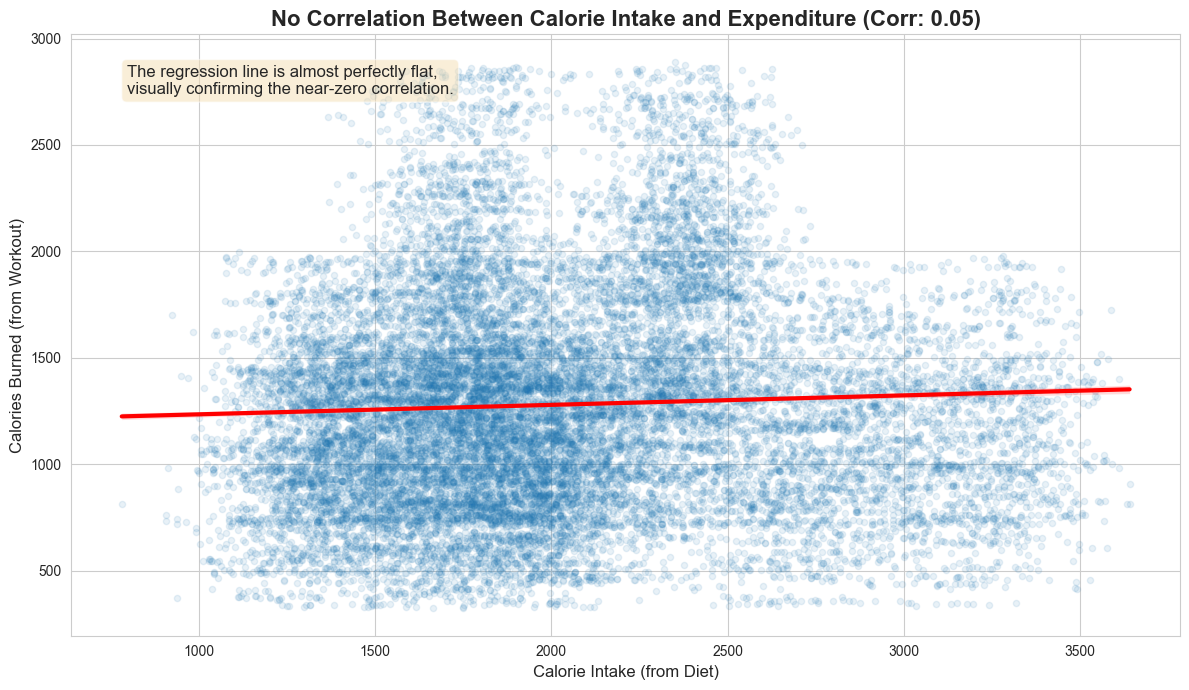

In [4]:
print("\n--- 3. Visualizing Finding: Diet vs. Exercise ---")
plt.figure(figsize=(12, 7))

ax = sns.regplot(
    data=df,
    x='calories',
    y='calories_burned',
    line_kws={'color': 'red', 'linewidth': 3},
    scatter_kws={'alpha': 0.1, 's': 20}
)

ax.set_title('No Correlation Between Calorie Intake and Expenditure (Corr: 0.05)', fontsize=16, fontweight='bold')
ax.set_xlabel('Calorie Intake (from Diet)', fontsize=12)
ax.set_ylabel('Calories Burned (from Workout)', fontsize=12)

ax.text(
    0.05, 0.95,
    'The regression line is almost perfectly flat,\nvisually confirming the near-zero correlation.',
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
)

plt.tight_layout()
# plt.savefig('corr_calorie_intake_and_expenditure.png', dpi=300)
plt.show()

### [Important] Key Finding 3

What This Implies: Within this dataset, an individual's dietary habits and their exercise habits are disconnected. People who consume a high-calorie diet (e.g., 3,500 calories) are just as likely to have a low-expenditure workout (e.g., 500 calories) as they are a high-expenditure one (e.g., 2,500 calories). Conversely, people who perform intense, high-burn workouts are not strategically consuming more calories to match their energy needs.

We have some suggestions:
1. Embrace the "Calories In vs. Calories Out" (CICO) Principle: The chart shows people are not balancing this equation. The first step to a healthier lifestyle is understanding that weight is managed by the balance between the energy you consume (intake) and the energy you use (expenditure).

2. Align Intake with Your Specific Goals:
    * For Weight Loss: A caloric deficit is required. This means Calories Burned (from all daily activity + workout) should be higher than Calorie Intake. The chart shows many people are likely in a high-surplus, high-intake, low-exercise pattern, which leads to weight gain.
    * For Muscle Gain/Performance: A slight caloric surplus is needed. Calorie Intake should be slightly higher than Calories Burned to provide the energy for muscle repair and growth. The chart shows many people may be "under-fueling" their intense workouts (e.g., eating 1,500 calories but burning 2,500), which can hinder recovery.

We'll continue our data mining from the previous finding topic, "fitness." Which Workout Type Burns the Most Calories?


--- 4. Analysis Finding: Which Workout Type Burns the Most Calories? ---
--- Median Calories Burned by Workout Type (Sorted) ---


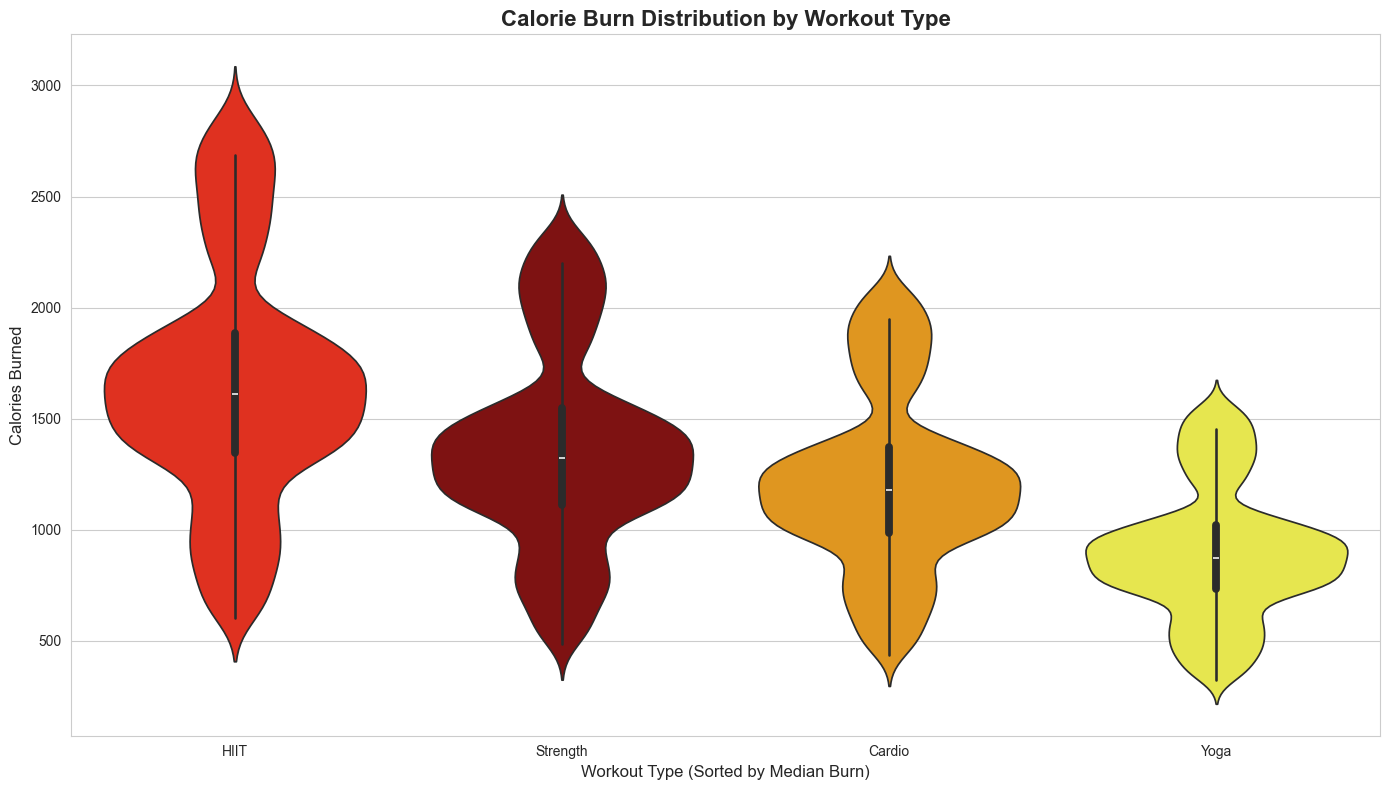

In [5]:
print("\n--- 4. Analysis Finding: Which Workout Type Burns the Most Calories? ---")

median_burn_order = df.groupby('workout_type')['calories_burned'].median().sort_values(ascending=False).index

print("--- Median Calories Burned by Workout Type (Sorted) ---")
sorted_burn_medians = df.groupby('workout_type')['calories_burned'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

ax = sns.violinplot(
    data=df,
    x='workout_type',
    y='calories_burned',
    order=median_burn_order,
    palette='hot',
    inner='box',
    hue='workout_type',
    legend=False
)

ax.set_title('Calorie Burn Distribution by Workout Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Workout Type (Sorted by Median Burn)', fontsize=12)
ax.set_ylabel('Calories Burned', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
# plt.savefig('calories_burned_by_workout_type.png', dpi=300)
plt.show()

### [Important] Key Finding 4

* HIIT (High-Intensity Interval Training) has the highest median calorie expenditure. This is scientifically sound, as HIIT is designed to push your heart rate to its limit for short periods of time, thereby maximizing calorie expenditure over the total session duration.
* Strength training burns more calories than cardio exercise like running. This **contradicts our assumption**, because cardio is more tiring, increases heart rate, and burns fat faster.
* Yoga has the lowest median calorie expenditure. This is entirely expected. The primary purpose of yoga is not high calorie burning, but rather flexibility, balance, mental health, and muscular endurance.

Here are some suggestions for a healthy life:
* Don't rely solely on "cardio" for fat loss: This is a very common misconception. Many people only do steady-state cardio (Cardio) to lose fat. This chart strongly demonstrates that *strength training* and *HIIT* are equally effective, or even superior, in terms of total calorie expenditure.
* Embrace a “hybrid” workout plan: The healthiest physical condition is a combination of strength, endurance, and flexibility.

🤔 We can research some interesting topics: 1. Does Higher Water Intake Relate to Higher Rating?


--- Analysis: Does Higher Water Intake Relate to Higher Rating? ---

--- 5. Correlation between water_intake_(liters) and rating ---
Pearson correlation (r)  : 0.0374, p-value = 1.1759e-07
Spearman correlation (rho): 0.0405, p-value = 9.8511e-09

--- Plotting: Combined Linear & Nonlinear Regression ---


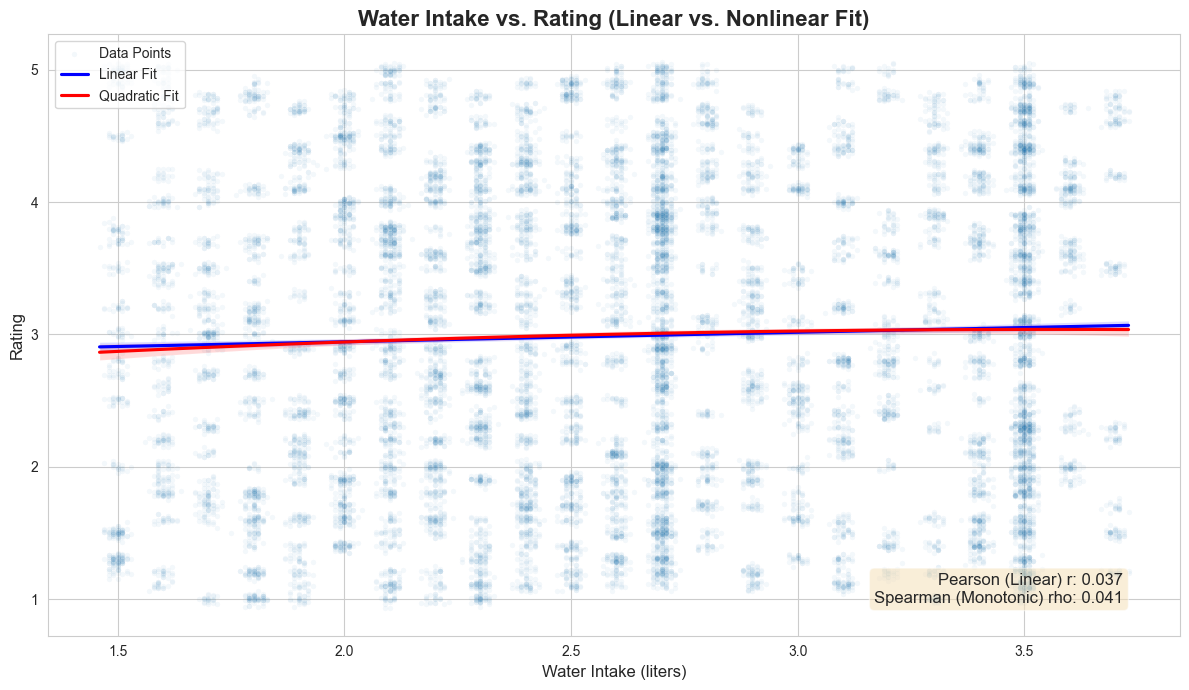


--- Plotting: Rating Distribution by Water Intake Quartiles ---

--- Mean Rating by Water Intake Quartile ---


/var/folders/0w/_ryt27g11tdd6qsbdwz462gr0000gn/T/ipykernel_76868/617215799.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_bin = df.groupby('water_intake_bin')[y_col].mean(numeric_only=True)


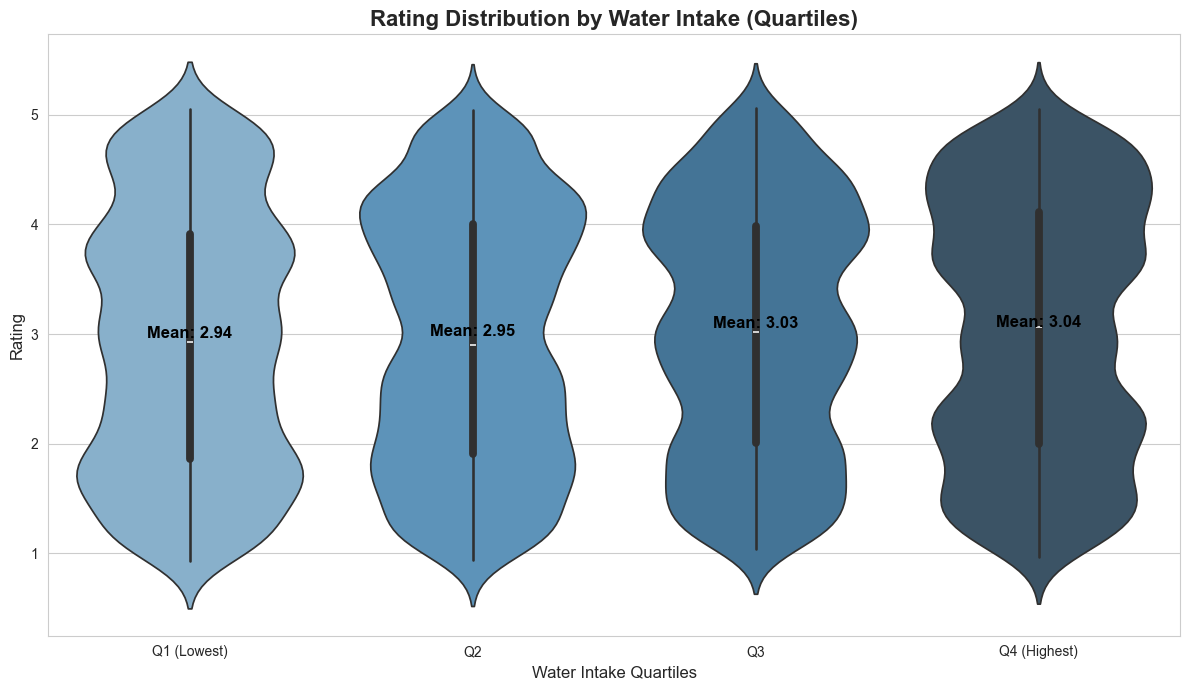

In [6]:
from scipy.stats import pearsonr, spearmanr
sns.set_style("whitegrid")

x_col = 'water_intake_(liters)'
y_col = 'rating'

print("\n--- Analysis: Does Higher Water Intake Relate to Higher Rating? ---")
print(f"\n--- 5. Correlation between {x_col} and {y_col} ---")

pearson_r, pearson_p = pearsonr(df[x_col], df[y_col])
spearman_r, spearman_p = spearmanr(df[x_col], df[y_col])

print(f"Pearson correlation (r)  : {pearson_r:.4f}, p-value = {pearson_p:.4e}")
print(f"Spearman correlation (rho): {spearman_r:.4f}, p-value = {spearman_p:.4e}")

print("\n--- Plotting: Combined Linear & Nonlinear Regression ---")

plt.figure(figsize=(12, 7))

ax = sns.scatterplot(
    data=df,
    x=x_col,
    y=y_col,
    alpha=0.05,
    s=15,
    label='Data Points'
)

sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    scatter=False,
    color='blue',
    label='Linear Fit',
    ax=ax
)

sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    scatter=False,
    color='red',
    order=2,
    label='Quadratic Fit',
    ax=ax
)

ax.set_title('Water Intake vs. Rating (Linear vs. Nonlinear Fit)', fontsize=16, fontweight='bold')
ax.set_xlabel('Water Intake (liters)', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)
ax.legend(loc='upper left')

stats_text = (
    f"Pearson (Linear) r: {pearson_r:.3f}\n"
    f"Spearman (Monotonic) rho: {spearman_r:.3f}"
)
ax.text(
    0.95, 0.05, stats_text,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
)

plt.tight_layout()
# plt.savefig('water_vs_rating_linear.png', dpi=300)
plt.show()

print("\n--- Plotting: Rating Distribution by Water Intake Quartiles ---")

df['water_intake_bin'] = pd.qcut(
    df[x_col],
    4,
    labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']
)

mean_rating_by_bin = df.groupby('water_intake_bin')[y_col].mean(numeric_only=True)
print("\n--- Mean Rating by Water Intake Quartile ---")
plt.figure(figsize=(12, 7))
bin_order = ['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']

ax2 = sns.violinplot(
    data=df,
    x='water_intake_bin',
    y=y_col,
    order=bin_order,
    palette='Blues_d',
    inner='box',
    hue='water_intake_bin',
    legend=False
)

ax2.set_title('Rating Distribution by Water Intake (Quartiles)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Water Intake Quartiles', fontsize=12)
ax2.set_ylabel('Rating', fontsize=12)
plt.xticks(rotation=0)

for i, bin_name in enumerate(bin_order):
    ax2.text(
        i,
        mean_rating_by_bin.loc[bin_name],
        f"Mean: {mean_rating_by_bin.loc[bin_name]:.2f}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
# plt.savefig('water_vs_rating_binned.png', dpi=300)
plt.show()

### [Important] Key Finding 5
Correlation exists between water intake and rating (happiness). As shown in the linear fit image, although the slope is small, it's clear that as water intake increases, mood ratings improve. The violin plot also provides some quantitative data. By dividing the water intake into quartiles, we can see that mood ratings gradually increase with water consumption. Furthermore, in the Q4 group, which drank the most water, the largest number of people had ratings between 4 and 5. This demonstrates that increased water intake does indeed improve mood.

Here are some suggestions for a healthy life:

* Drinking plenty of water regularly is not only good for your health, but it can also improve your mood.
* Although drinking water not only significantly avoids low mood scores (fewer people with a rating less than 2), it also helps to improve an already good mood.

🤔 Intersting topic 2. Are Different Diet Types Associated with Different Ratings?
e.g.:


--- 6. Are Different Diet Types Associated with Different Ratings? ---


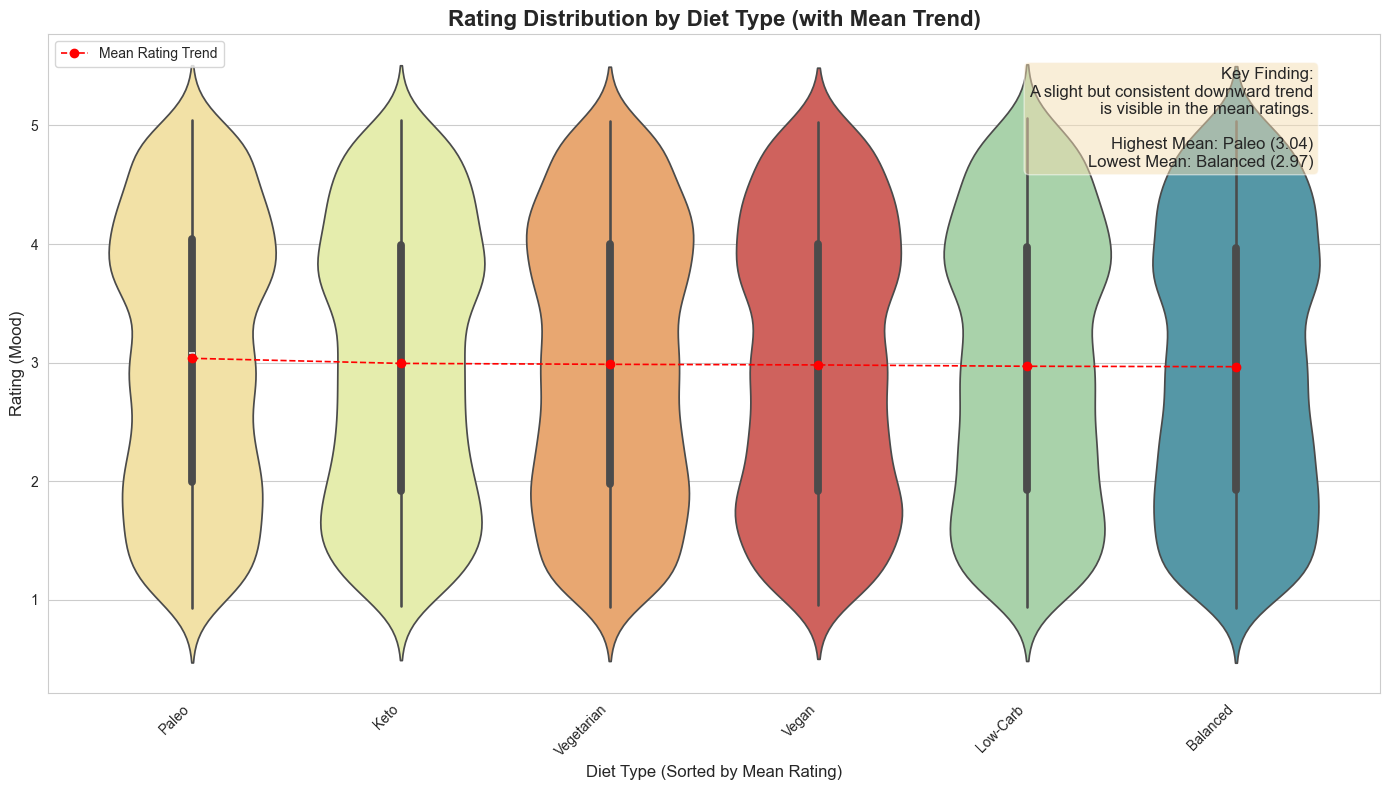

In [7]:
sns.set_style("whitegrid")
x_col = 'diet_type'
y_col = 'rating'

print(f"\n--- 6. Are Different Diet Types Associated with Different Ratings? ---")

sorted_mean_ratings = df.groupby(x_col)[y_col].mean(numeric_only=True).sort_values(ascending=False)
mean_rating_order = sorted_mean_ratings.index

plt.figure(figsize=(14, 8))
ax = sns.violinplot(
    data=df,
    x=x_col,
    y=y_col,
    order=mean_rating_order,
    palette='Spectral',
    inner='box',
    hue=x_col,
    legend=False
)

plt.plot(
    range(len(sorted_mean_ratings)),
    sorted_mean_ratings.values,
    color='red',
    marker='o',
    linestyle='--',
    linewidth=1.2,
    markersize=6,
    label='Mean Rating Trend'
)

ax.set_title('Rating Distribution by Diet Type (with Mean Trend)', fontsize=16, fontweight='bold')
ax.set_xlabel('Diet Type (Sorted by Mean Rating)', fontsize=12)
ax.set_ylabel('Rating (Mood)', fontsize=12)
plt.xticks(rotation=45, ha='right')

ax.legend(loc='upper left')

highest_rating_diet = sorted_mean_ratings.index[0]
lowest_rating_diet = sorted_mean_ratings.index[-1]

annotation_text = (
    f"Key Finding:\n"
    f"A slight but consistent downward trend\n"
    f"is visible in the mean ratings.\n\n"
    f"Highest Mean: {highest_rating_diet} ({sorted_mean_ratings.iloc[0]:.2f})\n"
    f"Lowest Mean: {lowest_rating_diet} ({sorted_mean_ratings.iloc[-1]:.2f})"
)

ax.text(
    0.95, 0.95,
    annotation_text,
    transform=ax.transAxes,
    fontsize=12,
    horizontalalignment='right',
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
)

plt.tight_layout()
# plt.savefig('diet_vs_rating_violin_with_trend.png', dpi=300)
plt.show()

### [Important] Key Finding 6
Based on the visualization, the differences in mood ratings across diet types are small but noticeable. Paleo users report the highest average rating (3.07), while Balanced diet users show the lowest (2.97). Although the absolute difference is modest (~0.1), several behavioral and nutritional factors may explain this pattern:
1. Paleo diets often produce more stable blood sugar levels
    * The Paleo diet excludes refined carbohydrates and processed sugars. This can contribute to slightly higher subjective mood ratings after meals or activities.
2. Higher protein and healthy fat intake may increase satiety and well-being
    * Paleo and Keto tend to emphasize: lean meats, nuts, avocados, whole-food sources.
    * These nutrients are known to promote satiety, steady energy release, reduced “post-meal crashes”, This may positively influence self-reported mood.
3. Balanced diet users may include more processed meals or lower variability
    * Although “Balanced” sounds healthy, in real-world logging behavior: it may include a mix of processed meals, higher carbohydrate density, more sugar or sodium, quicker meals with lower meal satisfaction. This may explain why the Balanced group shows slightly lower average mood ratings.

Here are some suggestions for a healthy life:

1. Prioritize whole foods to support mood stability: Across Paleo, Keto, Vegan, and Vegetarian diets, one common pattern is a focus on whole and minimally processed foods. Regardless of diet type, individuals may benefit from: reducing processed sugars, limiting refined carbohydrates, choosing whole-food ingredients. These choices may improve energy consistency and mood.
2. Maintain balanced macronutrient distribution. Even though Balanced diet users showed slightly lower ratings, the issue may not be the “balanced” concept itself, but rather: inconsistent nutrient quality, processed food variations. A refined balanced diet that emphasizes whole grains, lean proteins, fruits, and vegetables would likely produce higher mood scores.

🤔 Interesting topic 3. Does Higher Workout Intensity Lead to Better Mood?
e.g.: People with a higher average heart rate during exercise have higher endorphin levels, resulting in a higher rating. Conversely, people with excessively high heart rates have a lower rating.


--- 7. Does Higher Workout Intensity Lead to Better Mood? (avg_bpm vs rating) ---

--- Correlation between avg_bpm and rating ---
Pearson correlation (r):  -0.0188, p-value = 7.8337e-03
Spearman correlation (rho): -0.0163, p-value = 2.0840e-02

--- Plotting: avg_bpm vs Rating (Linear & Quadratic Regression) ---


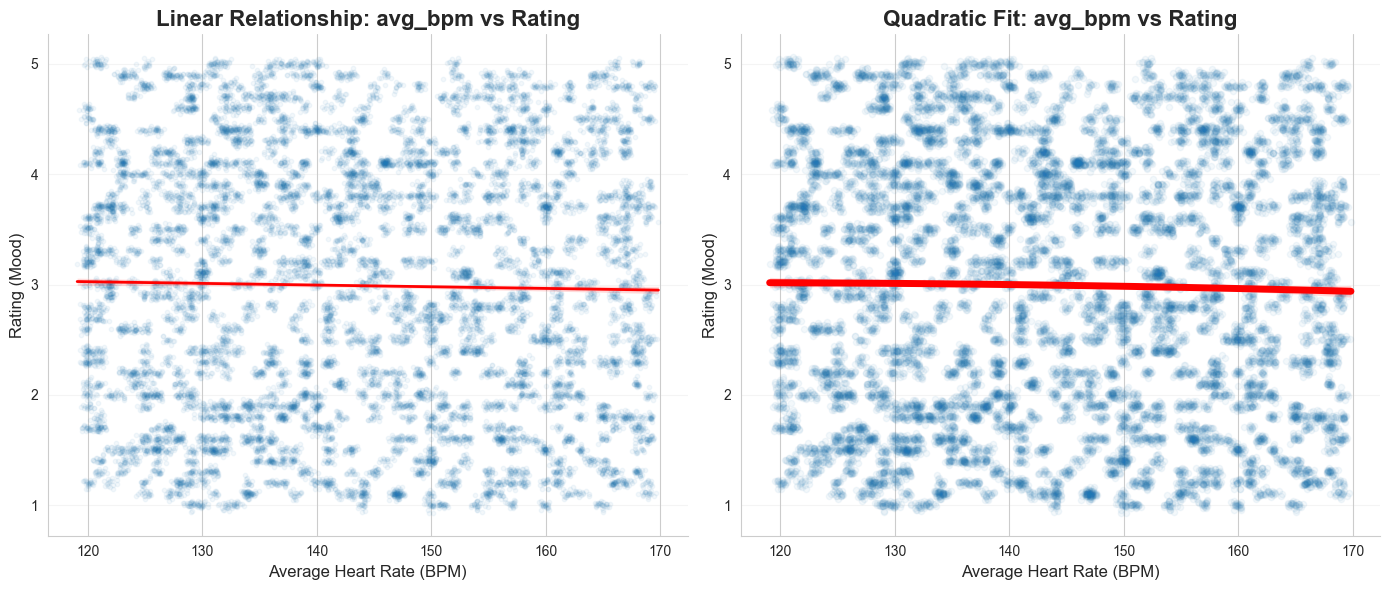

In [8]:
x_col = 'avg_bpm'
y_col = 'rating'

print("\n--- 7. Does Higher Workout Intensity Lead to Better Mood? (avg_bpm vs rating) ---")

print(f"\n--- Correlation between {x_col} and {y_col} ---")

pearson_r, pearson_p = pearsonr(df[x_col], df[y_col])
spearman_r, spearman_p = spearmanr(df[x_col], df[y_col])

print(f"Pearson correlation (r):  {pearson_r:.4f}, p-value = {pearson_p:.4e}")
print(f"Spearman correlation (rho): {spearman_r:.4f}, p-value = {spearman_p:.4e}")

print("\n--- Plotting: avg_bpm vs Rating (Linear & Quadratic Regression) ---")

plt.figure(figsize=(14, 6))

ax1 = plt.subplot(1, 2, 1)
sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    scatter_kws={'alpha': 0.05, 's': 10},
    line_kws={'linewidth': 2, 'color': 'red'}
)
ax1.set_title('Linear Relationship: avg_bpm vs Rating', fontsize=16, fontweight='bold')
ax1.set_xlabel('Average Heart Rate (BPM)', fontsize=12)
ax1.set_ylabel('Rating (Mood)', fontsize=12)
sns.despine(ax=ax1)
ax1.grid(axis='y', alpha=0.2)

ax2 = plt.subplot(1, 2, 2)
sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    order=2,
    scatter_kws={'alpha': 0.05, 's': 20},
    line_kws={'linewidth': 5,  'color': 'red'}
)
ax2.set_title('Quadratic Fit: avg_bpm vs Rating', fontsize=16, fontweight='bold')
ax2.set_xlabel('Average Heart Rate (BPM)', fontsize=12)
ax2.set_ylabel('Rating (Mood)', fontsize=12)
sns.despine(ax=ax2)
ax2.grid(axis='y', alpha=0.2)

plt.tight_layout()
# plt.savefig('workout_intensity_vs_mood_rating.png', dpi=300)
plt.show()

### [Important] Key Finding 7
As average workout heart rate (avg_bpm) increases, the mood rating tends to decrease slightly. In other words, higher workout intensity is associated with lower post-exercise mood. This is somewhat **counterintuitive**.

* Anaerobic stress can temporarily reduce emotional well-being. Very high heart rate zones rely more on anaerobic metabolism. This increases: lactate accumulation, muscle burn, oxygen debt, sympathetic nervous activation (fight-or-flight). These physiological states do not feel pleasant, even if they improve fitness long term.
* High-intensity workouts increase perceived exertion. When avg_bpm rises above moderate levels (150+ bpm), the workout begins to feel: more physically stressful, more difficult to sustain, metabolically taxing. This often produces: increased discomfort, higher RPE (Rate of Perceived Exertion), short-term fatigue. All of which can suppress immediate mood rating.

Health & Lifestyle Recommendations (Based on the Findings):

* Prioritize moderate-intensity workouts for emotional well-being. Aim for Avg BPM ≈ 120–145 (Zone 2–3), because: mood ratings are higher, endorphin release is optimal, recovery is better, workouts feel more enjoyable and sustainable. This zone is ideal for: jogging, brisk walking, steady cycling, light strength training, low-intensity cardio.
* Add a cool-down or mindfulness component after hard sessions. Because mood drops after intense training, try: 5–10 minutes slow cycling or walking, breathing exercises, gentle stretching, meditation. These shift the nervous system from “stress” to “relaxation,” improving the mood rating afterward.

## Train a Random Forest classifier to predict calorie burn categories


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("\n--- Random Forest Classifier: Calorie Burn Category Prediction ---")

y = pd.qcut(
    df['calories_burned'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

X = df.drop(columns=['calories_burned', 'burns_calories_bin'], errors='ignore')

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols[:5], "...")

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

rf_classifier = RandomForestClassifier(
    n_estimators=400,
    max_depth=18,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', rf_classifier)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

cat_features = model.named_steps['preprocess'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([cat_features, numeric_cols])

importances = model.named_steps['clf'].feature_importances_

feat_imp = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n--- Top 10 Most Important Features ---")
print(feat_imp.head(10))


--- Random Forest Classifier: Calorie Burn Category Prediction ---
Categorical: ['gender', 'workout_type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'exercise', 'benefit', 'target_muscle_group', 'equipment_needed', 'difficulty_level', 'body_part', 'type_of_muscle', 'workout']
Numeric: ['age', 'weight_(kg)', 'height_(m)', 'max_bpm', 'avg_bpm'] ...

--- Classification Report ---
              precision    recall  f1-score   support

        High       0.98      0.98      0.98      1250
         Low       0.97      0.99      0.98      1252
      Medium       0.97      0.96      0.97      1248
   Very High       1.00      0.99      0.99      1250

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


--- Confusion Matrix ---
[[1223    0   21    6]
 [   0 1240   12    0]
 [  13   35 1200    0]
 [  17    0    0 1233]]

--- Top 10 Most Important Features ---
          

In order to answer this question and do the visualization, we use `SHAP`. With `SHAP`, we can easily identify the contributions of different attributes and categories to the Calorie Burn Classifier.

In [12]:
import shap
print("\n--- SHAP Analysis: Explaining Random Forest Calorie Burn Classifier ---")

X_pre = model.named_steps['preprocess'].transform(X_train)
if hasattr(X_pre, "toarray"):
    X_pre = X_pre.toarray()
X_pre = X_pre.astype(np.float32)

n_sample = 500
n_total = X_pre.shape[0]

if n_total > n_sample:
    idx = np.random.choice(n_total, n_sample, replace=False)
    X_sample = X_pre[idx]
else:
    X_sample = X_pre

print(f"Computing SHAP values for {X_sample.shape[0]} samples ...")

cat_features = model.named_steps['preprocess'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([cat_features, numeric_cols])

explainer = shap.TreeExplainer(model.named_steps['clf'])

shap_values = explainer.shap_values(X_sample, check_additivity=False)

print("Done computing SHAP values!")


--- SHAP Analysis: Explaining Random Forest Calorie Burn Classifier ---
Computing SHAP values for 500 samples ...
Done computing SHAP values!



--- Plotting Clean SHAP Summary Bar Plot (Top 10) ---


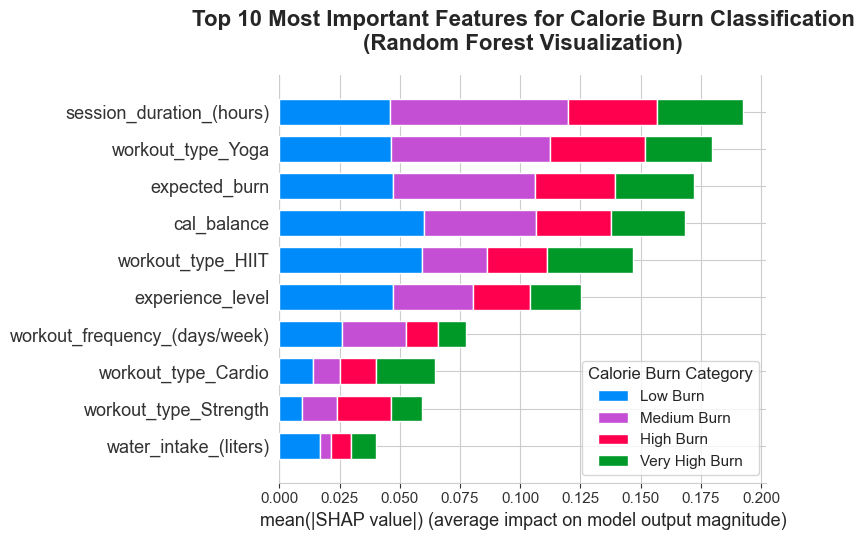

In [20]:
print("\n--- Plotting Clean SHAP Summary Bar Plot (Top 10) ---")

class_name_map = ["Low Burn", "Medium Burn", "High Burn", "Very High Burn"]

plt.figure(figsize=(12, 8))

shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=all_features,
    plot_type="bar",
    max_display=10,
    show=False
)

# 修改标题
plt.title(
    "Top 10 Most Important Features for Calorie Burn Classification\n(Random Forest Visualization)",
    fontsize=16,
    fontweight="bold",
    pad=18
)

handles, labels = plt.gca().get_legend_handles_labels()

handles = handles[:4]
new_labels = class_name_map[:len(handles)]

plt.legend(
    handles,
    new_labels,
    title="Calorie Burn Category",
    fontsize=11,
    title_fontsize=12,
    loc="lower right",
    frameon=True
)

plt.tight_layout()
# plt.savefig("SHAP_summary_bar.png", dpi=300)
plt.show()

### [Important] Random Forest Results 1
The Random Forest classifier successfully distinguishes the four calorie-burn categories (Low, Medium, High, Very High).
The SHAP summary plot shows that the model primarily relies on exercise-related behavioral features — particularly session duration, workout type, expected burn, and calorie balance — to make predictions.
The clear class-specific SHAP contributions demonstrate that the model is capturing meaningful patterns that separate the four calorie-burn levels.

Question: Does the calorie-burn category have any impact on gender?


--- SHAP Gender Effect Analysis: Do Males and Females Differ in Calorie Burn Categories? ---

--- Mean SHAP contributions of Gender features by Calorie Burn Category ---


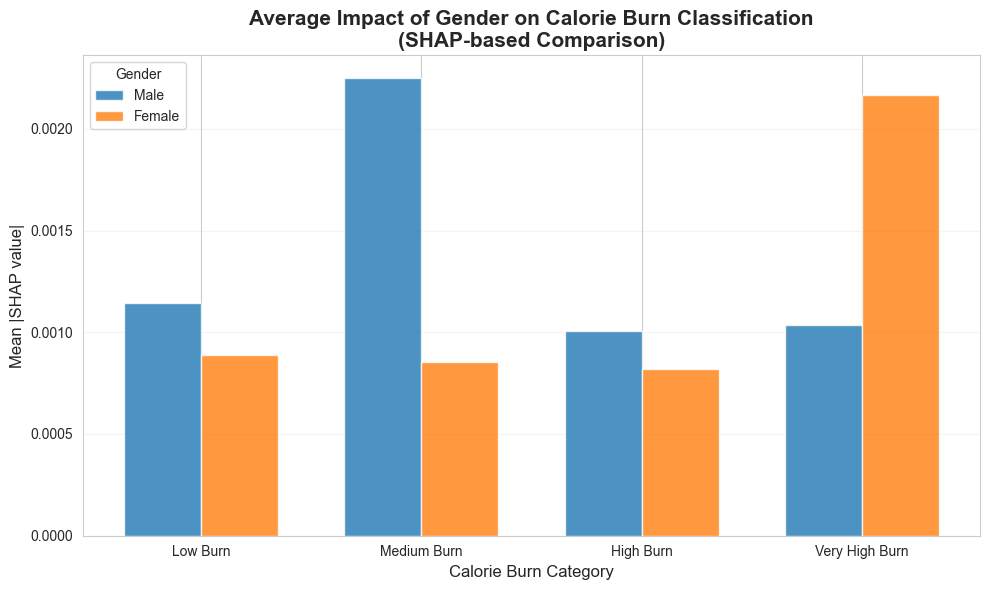

In [22]:
print("\n--- SHAP Gender Effect Analysis: Do Males and Females Differ in Calorie Burn Categories? ---")

try:
    idx_gender_male = list(all_features).index("gender_Male")
    idx_gender_female = list(all_features).index("gender_Female")
except ValueError as e:
    raise ValueError("Could not find 'gender_Male' or 'gender_Female' in all_features. "
                     "Check your OneHotEncoder categories.") from e

# print(f"Index of gender_Male: {idx_gender_male}")
# print(f"Index of gender_Female: {idx_gender_female}")

class_names = ["Low Burn", "Medium Burn", "High Burn", "Very High Burn"]

rows = []
for class_idx, class_name in enumerate(class_names):
    shap_male = shap_values[class_idx][:, idx_gender_male]
    shap_female = shap_values[class_idx][:, idx_gender_female]

    rows.append({
        "class_idx": class_idx,
        "class_name": class_name,
        "mean_shap_gender_Male": np.mean(shap_male),
        "mean_abs_shap_gender_Male": np.mean(np.abs(shap_male)),
        "mean_shap_gender_Female": np.mean(shap_female),
        "mean_abs_shap_gender_Female": np.mean(np.abs(shap_female)),
    })

gender_shap_df = pd.DataFrame(rows)
print("\n--- Mean SHAP contributions of Gender features by Calorie Burn Category ---")
# print(gender_shap_df)

x = np.arange(len(class_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(
    x - width/2,
    gender_shap_df["mean_abs_shap_gender_Male"],
    width,
    label="Male",
    alpha=0.8
)
plt.bar(
    x + width/2,
    gender_shap_df["mean_abs_shap_gender_Female"],
    width,
    label="Female",
    alpha=0.8
)

plt.xticks(x, class_names, rotation=0)
plt.ylabel("Mean |SHAP value|", fontsize=12)
plt.xlabel("Calorie Burn Category", fontsize=12)
plt.title("Average Impact of Gender on Calorie Burn Classification\n(SHAP-based Comparison)", fontsize=15, fontweight="bold")
plt.legend(title="Gender")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
# plt.savefig("SHAP_contributions_by_gender.png", dpi=300)
plt.show()

### [Important] Random Forest Results 2

The SHAP-based gender analysis shows that gender has only a modest overall influence on calorie-burn classification.

All SHAP values are very small (range 0.001 to 0.002). This indicates that: Gender has only a slight impact on classification decisions. Random Forest does not rely on gender to determine energy consumption levels. Other factors (training duration, training type, cal_balance, expected_burn, etc.) are far more important than gender.

However, gender effects are not uniform across classes:
* Male has the strongest impact in the Medium Burn category, suggesting more distinguishable patterns for male users at moderate intensity levels.
* Female shows the highest contribution in the Very High Burn category, indicating that exceptionally high calorie burn among female users is a more distinct and informative signal for the model.
Overall, behavioral features dominate the prediction, while gender acts as a secondary feature with class-specific effects.

Health & Lifestyle Recommendations (Based on the Findings):

Regardless of gender, it has been proven that gender has no impact on calorie consumption. Women are not at a physiological disadvantage, nor are men at a physiological advantage; as long as you exercise, there is no difference in calorie consumption.